<a href="https://colab.research.google.com/github/Monishraj50/BitCoin/blob/master/BitCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing Libraries 
import numpy as np 
import pandas as pd

In [3]:
#Importing BitCoin Dataset
bit_df = pd.read_csv('/content/drive/My Drive/BTC-USD.csv')

In [4]:
bit_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-29,239.016006,239.802002,235.927994,236.686996,236.686996,22691300.0
1,2015-09-30,236.639999,237.733994,235.628998,236.059998,236.059998,19743500.0
2,2015-10-01,236.003998,238.445007,235.615997,237.548996,237.548996,20488800.0
3,2015-10-02,237.264008,238.541000,236.602997,237.292999,237.292999,19677900.0
4,2015-10-03,237.201996,239.315002,236.944000,238.729996,238.729996,16482700.0


In [5]:
bit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1828 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.1+ KB


In [6]:
bit_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,5283.241761,5416.251011,5141.450625,5288.920493,5288.920493,9.706846e+09
std,4058.741862,4178.259039,3918.245479,4059.143514,4059.143514,1.228903e+10
min,236.003998,237.733994,235.615997,236.059998,236.059998,1.299900e+07
25%,849.533997,899.524994,827.176025,875.578980,875.578980,1.422130e+08
50%,5464.160156,5625.226563,5280.276855,5464.866699,5464.866699,4.543860e+09
75%,8614.469726,8800.005371,8369.385742,8644.146485,8644.146485,1.647797e+10
max,19475.800781,20089.000000,18974.099609,19497.400391,19497.400391,7.415677e+10


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


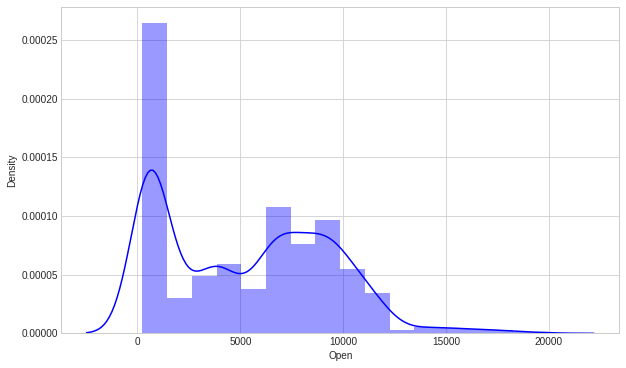

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

plt.figure(figsize=(10,6))
sns.distplot(bit_df['Open'],color='b')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


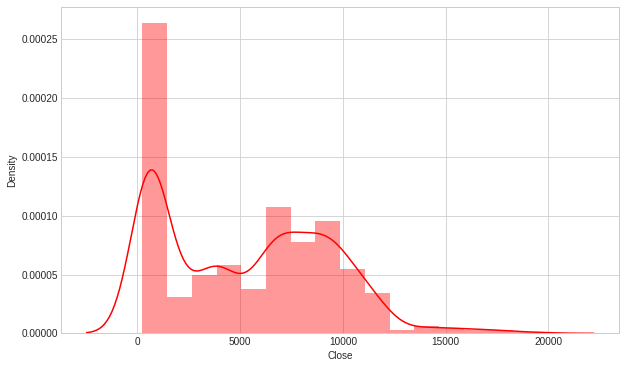

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(bit_df['Close'],color='r')

In [9]:
import datetime as dt
bit_df.loc[:, 'Date'] = pd.to_datetime(bit_df.loc[:,'Date'], format="%Y/%m/%d")

Converting all the date column into similar format

Text(0, 0.5, 'Volume prices')

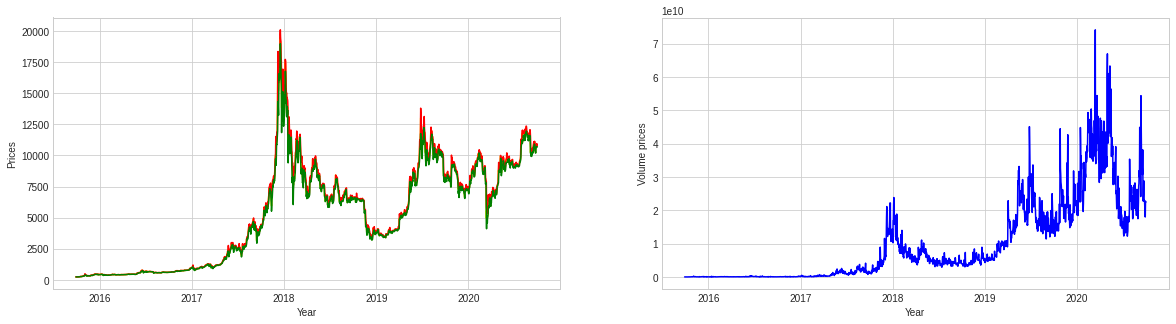

In [10]:
f, (ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(bit_df['Date'],bit_df['Open'],color='pink')
ax1.plot(bit_df['Date'],bit_df['Close'],color='yellow')
ax1.plot(bit_df['Date'],bit_df['High'],color='red')
ax1.plot(bit_df['Date'],bit_df['Low'],color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Prices')


ax2.plot(bit_df['Date'],bit_df['Volume'],color='blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Volume prices')

1.As we can see that ending of 2017 and starting of 2018 prices were suddenly increases.

2.After 2019 volume were increased a lot but not that much increased of prices compared to end of 2017.

## Technical Analysis

###Candlestick Chart

In [11]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(data=[go.Candlestick(x=bit_df['Date'],
                open=bit_df['Open'],
                high=bit_df['High'],
                low =bit_df['Low'],
                close=bit_df['Close'])])
fig.show()

Here we see that opened and closed prices and also the hike of the BitCoin with detailed analysis.Also the slider can help us study a particular time period by adjusting it accordingly.

##OHLC Chart

In [12]:
fig1 = go.Figure(data=[go.Ohlc(x=bit_df['Date'],
                open=bit_df['Open'],
                high=bit_df['High'],
                low =bit_df['Low'],
                close=bit_df['Close'],
                increasing_line_color= 'cyan', decreasing_line_color= 'gray')])
fig1.show()

We can see the OHLC chart (for open, high, low and close) is a style of financial chart describing open, high, low and close values for a given x coordinate (most likely time). The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing).

##Simple Moving Average

In [13]:
set1 = {
    'x':bit_df['Date'],
    'open':bit_df['Open'],
    'close':bit_df['Close'],
    'high':bit_df['High'],
    'low':bit_df['Low'],
    'type':'candlestick'
}

In [14]:
avg20 = bit_df['Close'].rolling(window=20,min_periods=1).mean()
avg50 = bit_df['Close'].rolling(window=50,min_periods=1).mean()
avg100 = bit_df['Close'].rolling(window=100,min_periods=1).mean()

In [15]:
set2 = {
    'x':bit_df['Date'],
    'y':avg20,
    'type':'scatter',
    'mode':'lines',
    'line':{
        'width':1,
        'color':'navy'
    },
    'name':'Moving Average of 20 periods'
}

In [16]:
set3 = {
    'x':bit_df['Date'],
    'y':avg50,
    'type':'scatter',
    'mode':'lines',
    'line':{
        'width':1,
        'color':'mediumseagreen'
    },
    'name':'Moving Average of 50 periods'
}

In [17]:
set4 = {
    'x':bit_df['Date'],
    'y':avg100,
    'type':'scatter',
    'mode':'lines',
    'line':{
        'width':1,
        'color':'orangered'
    },
    'name':'Moving Average of 100 periods'
}

In [18]:
data=[set1,set2,set3,set4]
layout=go.Layout({
    'title':'Bit Coin(2015-2020)',
    'font':{
        'size':10
    }
})

In [19]:
fig = go.Figure(data=data,layout=layout)
fig.show()

Here we can clearly the Moving average lines are present in the candlestick chart.It will show you the values associated with different dates when you hover over them. Also the slider can help us study a particular time period by adjusting it accordingly.

#FbProphet


##Prophet Introduction:
Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.

###Steps for using Prophet:

 1.Make sure you replace closing price for y and date for ds.

 2.Fit that dataframe to Prophet in order to detect future     patterns.

 3.Predict the upper and lower prices of the closing price.

In [20]:
from fbprophet import Prophet

prohpet_open = bit_df[['Date','Close']]
prophet_open = prohpet_open.rename(columns={'Date':'ds','Close':'y'})

In [21]:
m=Prophet()
m.fit(prophet_open)
future = m.make_future_dataframe(periods=365)
forecast =m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-09-29,844.186249,-474.441312,2104.614715,844.186249,844.186249,12.540682,12.540682,12.540682,-1.088942,-1.088942,-1.088942,13.629625,13.629625,13.629625,0.0,0.0,0.0,856.726932
1,2015-09-30,842.493278,-521.166913,2047.795677,842.493278,842.493278,-43.249563,-43.249563,-43.249563,-0.966261,-0.966261,-0.966261,-42.283301,-42.283301,-42.283301,0.0,0.0,0.0,799.243716
2,2015-10-01,840.800307,-588.968988,2061.072266,840.800307,840.800307,-113.947647,-113.947647,-113.947647,-16.616029,-16.616029,-16.616029,-97.331617,-97.331617,-97.331617,0.0,0.0,0.0,726.852661
3,2015-10-02,839.107336,-707.457857,1925.150106,839.107336,839.107336,-152.844634,-152.844634,-152.844634,-1.975942,-1.975942,-1.975942,-150.868692,-150.868692,-150.868692,0.0,0.0,0.0,686.262702
4,2015-10-03,837.414365,-729.117185,2055.889979,837.414365,837.414365,-189.776002,-189.776002,-189.776002,12.453462,12.453462,12.453462,-202.229465,-202.229465,-202.229465,0.0,0.0,0.0,647.638362


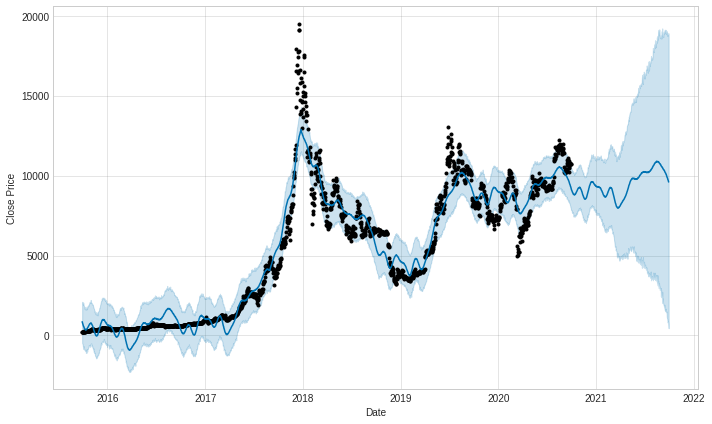

In [23]:
figure = m.plot(forecast,xlabel='Date',ylabel='Close Price')

From the above graph we expecting that the trend of BitCoin not changed for the next year.

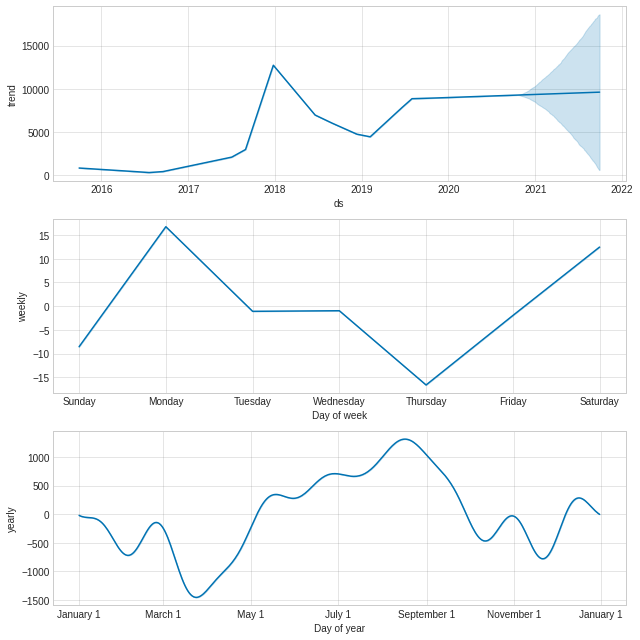

In [24]:
figure2 = m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Monthly Prediction \n 1 year time frame')

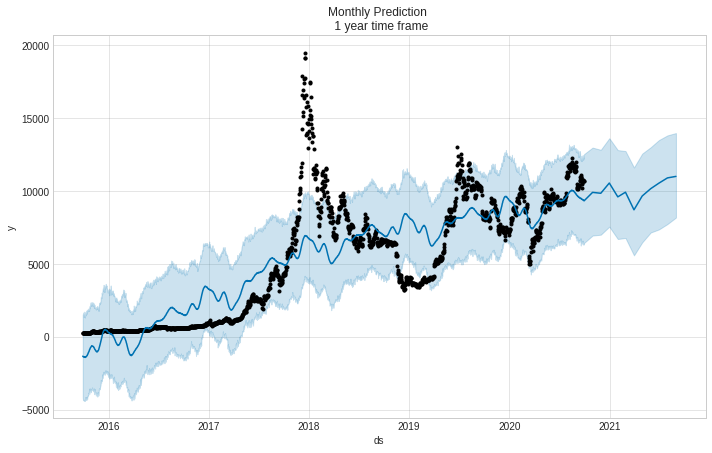

In [25]:
m = Prophet(changepoint_prior_scale=0.01).fit(prophet_open)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

Montly Prediction with one year time frame.

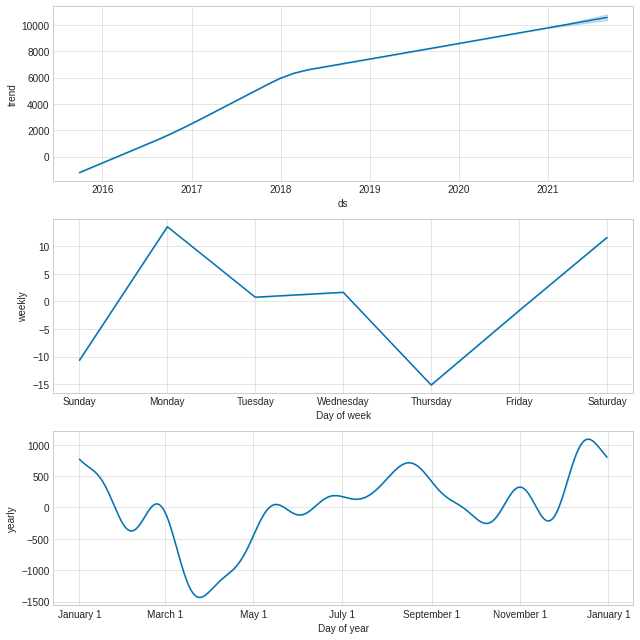

In [26]:
fig = m.plot_components(fcst)

Here are the trend analysis,weekly analysis,yearly analysis.